In [1]:
# importing the required modules
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

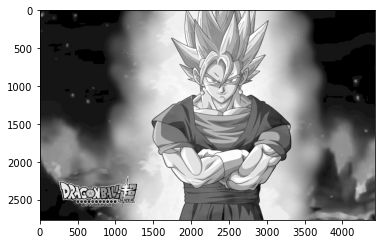

In [2]:
# getting a single channel image for histogram calculations
img2 = cv.imread('goku.png',0)
plt.imshow(img2, cmap = 'gray')

Text(0.5, 1.0, 'Histogram by Default Method')

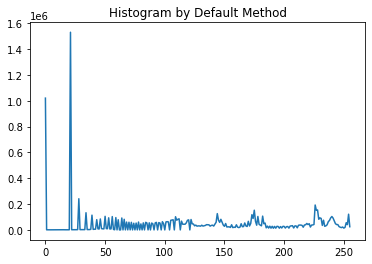

In [3]:
# calculating intensity values of an image using default Histogram method
img_hst = cv.calcHist([img2],[0], None, [256], [0, 256]) 
plt.plot(img_hst)
plt.title("Histogram by Default Method")

**Histogram:**

- gives you an overall idea about the intensity distribution of an image
- Histograms are collected counts of data organized into a set of predefined bins
- also describes the amount of contrast
- Contrast is a measure of the difference in brightness between light and dark areas in a scene
- By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image
   
    - can be calculated by finding the repeated values of pixels between 0 - 255
    - then these values will be plotted in 256 bins

Text(0.5, 1.0, 'Histogram by Scratch Implementation')

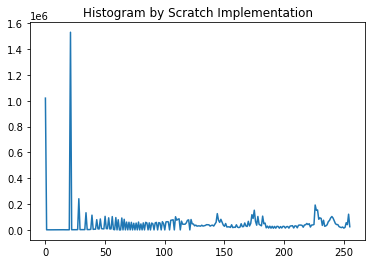

In [4]:
# intensity values of an image are calculated using scratch implementation of Histogram

# creating an empty lsit to store the bin values of histogram 
bins = [0 for i in range(256)]

# creating an empty list to store the pixel intensity values
pix_val = []

# iterating through the image and getting the intensity values 
# and then appending them to the empty pixel list
for pix in img2:
    for j in pix:
        pix_val.append(j)

# iterating through the pixel value list to get the bin values        
for k in pix_val:
    bins[k] += 1
    
plt.plot(bins) 
plt.title("Histogram by Scratch Implementation")

Text(0.5, 1.0, 'Histogram by Scratch Implementation')

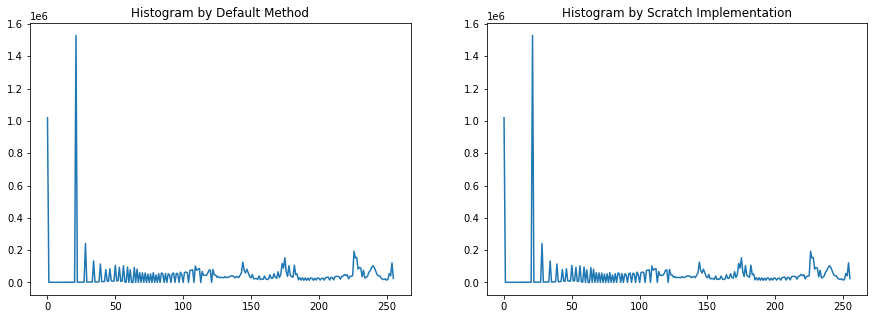

In [5]:
# plotting the results side by side for comparision
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(img_hst)
plt.title("Histogram by Default Method")

plt.subplot(1,2,2)
plt.plot(bins)
plt.title("Histogram by Scratch Implementation")

**Histogram Equalization:**

- It is a method that improves the contrast in an image, in order to stretch out the intensity range
- It does stretches out the intensity populated range to make the under populated area as a bit populated. 

    - at first, need to get the histogram
    - then should calculate the cdf of the pixel values
    - after that normalizing them to be in a range of 0 - 255
    - after all, plotting the stretched intenisty image

Text(0.5, 1.0, 'Histogram Equalization Default Method')

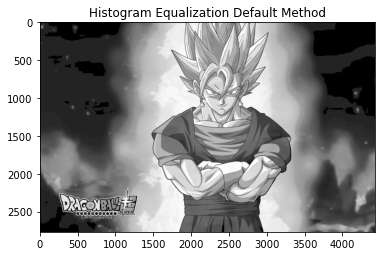

In [6]:
# stretching intensity values of an image using default Histogram Equalization method
img_hsteq = cv.equalizeHist(img2)
plt.imshow(img_hsteq, cmap = 'gray')
plt.title("Histogram Equalization Default Method")

Text(0.5, 1.0, 'Cumulative Distribution Function (cdf)')

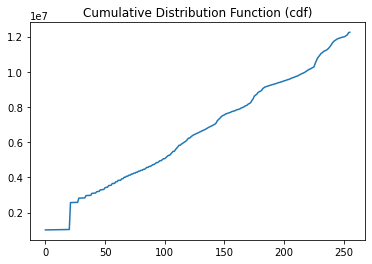

In [7]:
# Calculating the Cumulative distribution function for the image pixels

# creating an empty list to append the resulted pixel values
cdf=[]
j=0

# iterating through the length of the bins and then appendinf the outputs
# once those appended, list was converted to a numpy array for ease of calculation 
for i in range(0,len(bins)):
    j+=bins[i]
    np.array(cdf.append(j))
    
plt.plot(cdf)   
plt.title("Cumulative Distribution Function (cdf)")

Text(0.5, 1.0, 'Normalisation of CDF')

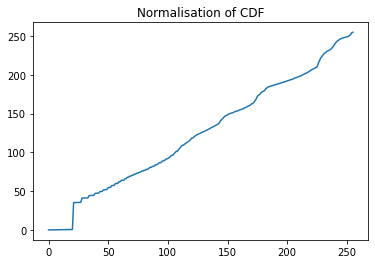

In [8]:
# normalizing the cdf to get the values in the range of 0 - 255

cdf = ((np.array(cdf) - min(cdf))/(max(cdf) - min(cdf)))*255

plt.plot(cdf)
plt.title("Normalisation of CDF")

Text(0.5, 1.0, 'Histogram Equalization from scratch')

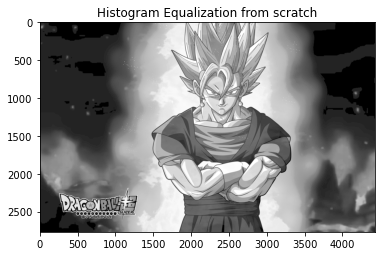

In [9]:
# Implementation of Histogram Equalization from scracth

# after getting the histogram, cdf and normalised cdf
# need to convert them back to our original image size
# once converted then we can see the results in plots
img_n = cdf[img2]

plt.imshow(img_n, cmap = 'gray')
plt.title("Histogram Equalization from scratch")

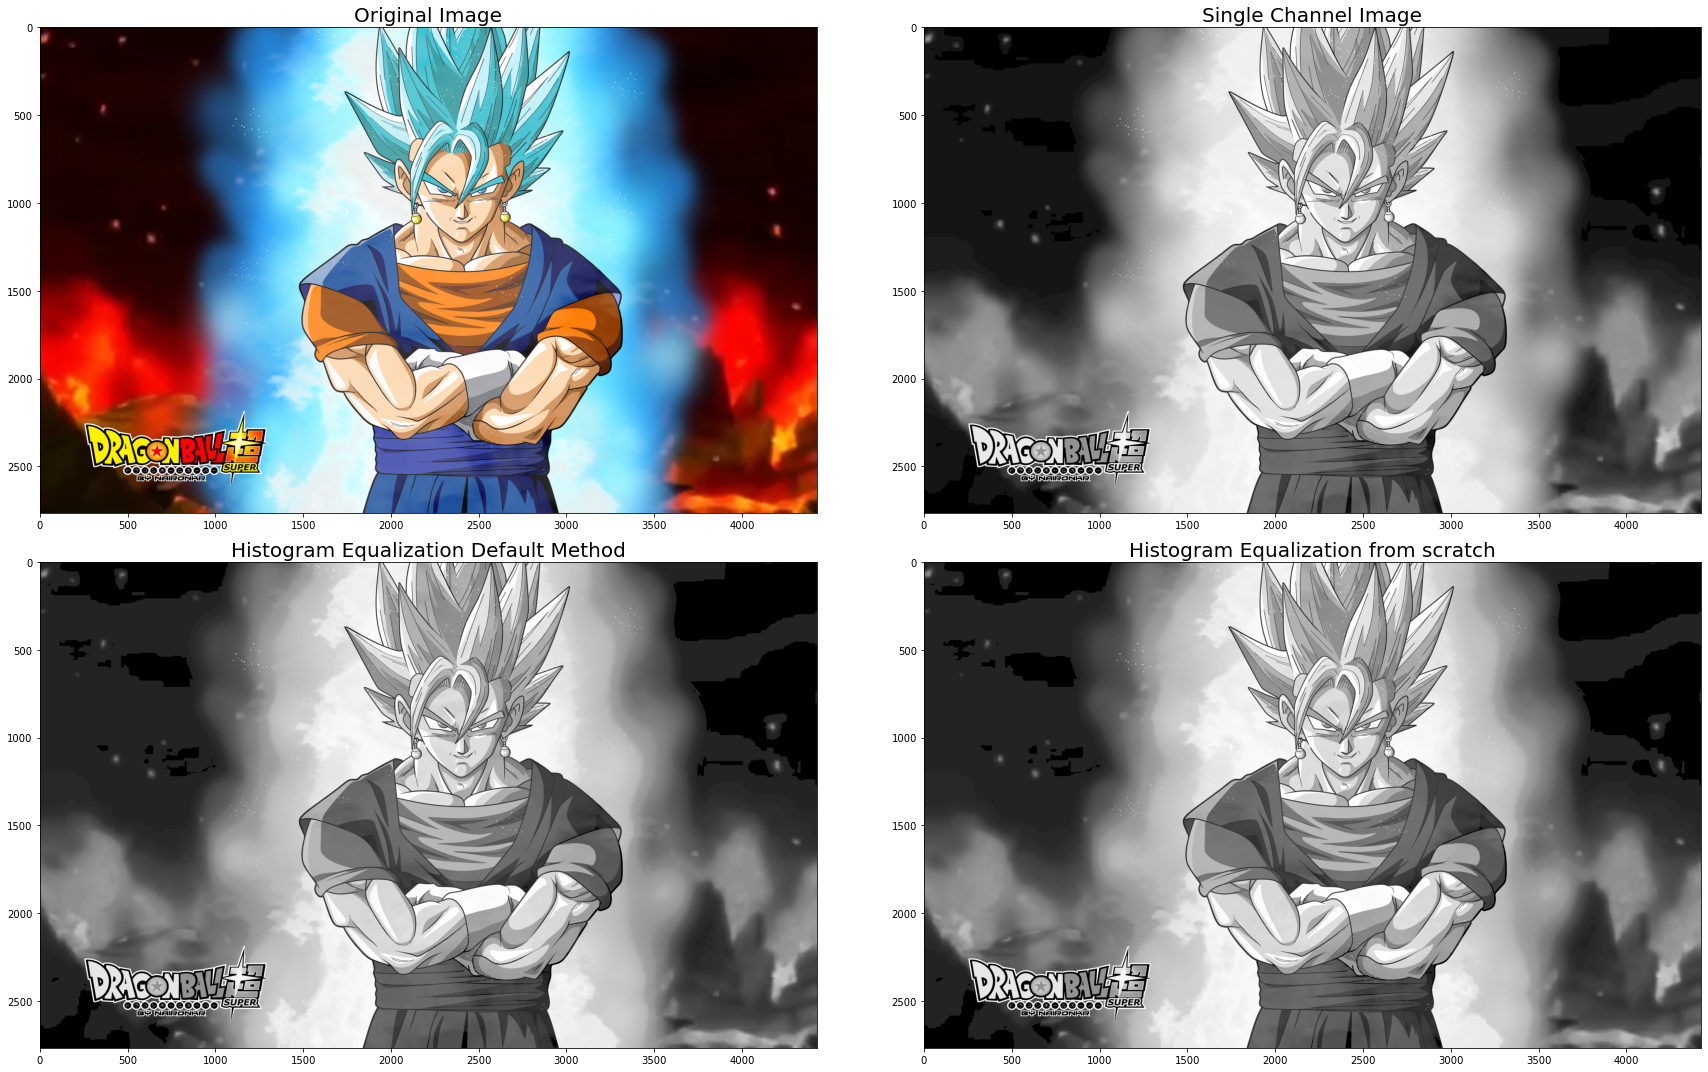

In [10]:
# Plotting all the results on a grid

img = cv.imread('goku.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

titles = ["Original Image", "Single Channel Image", "Histogram Equalization Default Method", "Histogram Equalization from scratch"]
images = [img, img2, img_hsteq, img_n]
plt.figure(figsize=(25,15))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i], fontsize = 20)
plt.tight_layout()
plt.show()